In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 행(row) 다 보기
pd.set_option('display.max_rows', None)

# 열(column) 다 보기
pd.set_option('display.max_columns', None)

In [2]:
from PublicDataReader import Ecos
service_key = "2G5XUDEN750MGRZM37GF"
api = Ecos(service_key)
df = api.get_statistic_table_list()
df.head()

,상위통계표코드,통계표코드,통계명,시점,검색가능여부,출처
0,*,0000000001,1. 통화/금융,None,N,None
1,0000000001,0000000002,1.1. 통화/유동성,None,N,None
2,0000000002,0000000003,1.1.1. 본원통화,None,N,None
3,0000000003,0000000004,1.1.1.1. 본원통화 구성내역,None,N,None
4,0000000004,102Y004,"1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)",M,Y,None


### 국가출별 수출
- 미국, 중국 나아가 홍콩 싱가프로까지 합치면 60% 넘음

In [3]:
df_ex = api.get_statistic_search(통계표코드="901Y011", 주기="M", 검색시작일자="202311", 검색종료일자="202510")
df_ex = df_ex[df_ex['통계항목코드1'] != 'FIEE']
df_ex['값'] = df_ex['값'].astype(float)

df_ex_agg = df_ex.groupby(['시점'], as_index=False).agg({'값':'sum'}).rename(columns={'값':'tot'})
df_ex = df_ex.merge(df_ex_agg, on='시점')
df_ex['ratio'] = np.round(df_ex['값'] / df_ex['tot'], 2) * 100
df_ex = df_ex[df_ex['ratio'] > 3]
df_ex.head()

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,통계항목명2,통계항목코드3,통계항목명3,통계항목코드4,통계항목명4,단위,WGT,시점,값,tot,ratio
0,901Y011,3.2.1.1. 국가별 수출,FIEE01,수출총액(일본),None,None,None,None,None,None,천달러,None,202311,2542677.0,42028849.0,6.0
1,901Y011,3.2.1.1. 국가별 수출,FIEE02,수출총액(중국),None,None,None,None,None,None,천달러,None,202311,11342928.0,42028849.0,27.0
2,901Y011,3.2.1.1. 국가별 수출,FIEE03,수출총액(홍콩),None,None,None,None,None,None,천달러,None,202311,2753504.0,42028849.0,7.0
3,901Y011,3.2.1.1. 국가별 수출,FIEE04,수출총액(대만),None,None,None,None,None,None,천달러,None,202311,1691821.0,42028849.0,4.0
4,901Y011,3.2.1.1. 국가별 수출,FIEE05,수출총액(싱가포르),None,None,None,None,None,None,천달러,None,202311,1684766.0,42028849.0,4.0


In [4]:
pd.pivot(data=df_ex, index='시점', columns='통계항목명1', values='ratio')

통계항목명1,수출총액(대만),수출총액(미국),수출총액(싱가포르),수출총액(인도),수출총액(일본),수출총액(중국),수출총액(호주),수출총액(홍콩)
시점,,,,,,,,
202311,4.0,26.0,4.0,4.0,6.0,27.0,NaN,7.0
202312,5.0,26.0,5.0,4.0,6.0,25.0,NaN,8.0
202401,4.0,25.0,4.0,4.0,6.0,26.0,4.0,7.0
202402,4.0,25.0,NaN,4.0,6.0,25.0,NaN,8.0
202403,5.0,25.0,5.0,4.0,5.0,25.0,4.0,9.0
202404,5.0,27.0,NaN,4.0,6.0,25.0,NaN,7.0
202405,6.0,25.0,4.0,4.0,6.0,26.0,NaN,6.0
202406,8.0,26.0,NaN,4.0,5.0,25.0,NaN,8.0
202407,7.0,24.0,NaN,4.0,6.0,27.0,NaN,6.0


### 국가입별 수입

In [5]:
df_ex = api.get_statistic_search(통계표코드="901Y012", 주기="M", 검색시작일자="202311", 검색종료일자="202510")
df_ex = df_ex[df_ex['통계항목코드1'] != 'FIEF']
df_ex['값'] = df_ex['값'].astype(float)

df_ex_agg = df_ex.groupby(['시점'], as_index=False).agg({'값':'sum'}).rename(columns={'값':'tot'})
df_ex = df_ex.merge(df_ex_agg, on='시점')
df_ex['ratio'] = np.round(df_ex['값'] / df_ex['tot'], 2) * 100
df_ex = df_ex[df_ex['ratio'] > 3]
df_ex.head()

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,통계항목명2,통계항목코드3,통계항목명3,통계항목코드4,통계항목명4,단위,WGT,시점,값,tot,ratio
0,901Y012,3.2.1.2. 국가별 수입,FIEF01,수입총액(일본),None,None,None,None,None,None,천달러,None,202311,3717928.0,41832424.0,9.0
1,901Y012,3.2.1.2. 국가별 수입,FIEF02,수입총액(중국),None,None,None,None,None,None,천달러,None,202311,12087237.0,41832424.0,29.0
3,901Y012,3.2.1.2. 국가별 수입,FIEF04,수입총액(대만),None,None,None,None,None,None,천달러,None,202311,2068737.0,41832424.0,5.0
10,901Y012,3.2.1.2. 국가별 수입,FIEF11,수입총액(사우디아라비아),None,None,None,None,None,None,천달러,None,202311,2951579.0,41832424.0,7.0
15,901Y012,3.2.1.2. 국가별 수입,FIEF23,수입총액(독일),None,None,None,None,None,None,천달러,None,202311,1999468.0,41832424.0,5.0


In [6]:
pd.pivot(data=df_ex, index='시점', columns='통계항목명1', values='ratio')

통계항목명1,수입총액(네덜란드),수입총액(대만),수입총액(독일),수입총액(말레이지아),수입총액(미국),수입총액(사우디아라비아),수입총액(아랍에미레이트),수입총액(일본),수입총액(중국),수입총액(호주)
시점,,,,,,,,,,
202311,NaN,5.0,5.0,NaN,15.0,7.0,NaN,9.0,29.0,6.0
202312,NaN,5.0,5.0,NaN,15.0,7.0,4.0,9.0,26.0,7.0
202401,NaN,5.0,4.0,NaN,14.0,6.0,4.0,9.0,29.0,8.0
202402,NaN,6.0,5.0,NaN,15.0,6.0,4.0,10.0,25.0,6.0
202403,NaN,5.0,4.0,NaN,14.0,6.0,4.0,10.0,27.0,6.0
202404,NaN,5.0,4.0,NaN,14.0,6.0,5.0,9.0,28.0,7.0
202405,NaN,7.0,5.0,NaN,15.0,7.0,NaN,8.0,29.0,5.0
202406,NaN,6.0,5.0,NaN,14.0,6.0,4.0,9.0,28.0,6.0
202407,NaN,6.0,5.0,NaN,18.0,6.0,NaN,10.0,28.0,4.0


### 품목명 수출금액지수 (2020=100)

In [7]:
df_ex = api.get_statistic_search(통계표코드="403Y001", 주기="M", 검색시작일자="202001", 검색종료일자="202510")
df_ex['값'] = df_ex['값'].astype(float)

list_mm = df_ex['시점'].unique().tolist()
for mm in list_mm:
    df_tmp = df_ex[df_ex['시점'] == mm].sort_values(by='값', ascending=False)
    df_tmp[['통계항목코드1', '통계항목명1', '값']].head(30)

In [8]:
df_ex['통계항목코드1_길이'] = df_ex['통계항목코드1'].apply(lambda x: len(x))
df_ex3 = df_ex[(df_ex['통계항목코드1_길이'] == 3) & (df_ex['통계항목명1'] != '총지수')]
pd.pivot(data=df_ex3, index='시점', columns='통계항목명1', values='값').tail(12)


통계항목명1,공산품,농림수산품
시점,,
202409,135.60,123.29
202410,133.92,138.77
202411,130.91,146.51
202412,141.21,157.07
202501,112.82,100.96
202502,123.75,122.91
202503,133.78,117.41
202504,135.63,121.41
202505,133.49,100.64


In [9]:
df_ex5 = df_ex[(df_ex['통계항목코드1'].str.startswith('3')) & (df_ex['통계항목코드1'].str.endswith('AA')) & (df_ex['통계항목코드1_길이'] == 5)]
df_ex5['rnk'] = df_ex5.groupby(['시점'])['값'].rank(method='first', ascending=False)
df_ex5.head()

/var/folders/jk/1j1mgc7x11122bdp64mnjcf40000gp/T/ipykernel_77511/4289359897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex5['rnk'] = df_ex5.groupby(['시점'])['값'].rank(method='first', ascending=False)


,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,통계항목명2,통계항목코드3,통계항목명3,통계항목코드4,통계항목명4,단위,WGT,시점,값,통계항목코드1_길이,rnk
23,403Y001,3.3.1.1.1. 수출금액지수,301AA,음식료품,None,None,None,None,None,None,2020=100,None,202001,77.20,5,13.0
42,403Y001,3.3.1.1.1. 수출금액지수,302AA,섬유및가죽제품,None,None,None,None,None,None,2020=100,None,202001,106.79,5,3.0
46,403Y001,3.3.1.1.1. 수출금액지수,303AA,목재및종이제품,None,None,None,None,None,None,2020=100,None,202001,105.13,5,4.0
59,403Y001,3.3.1.1.1. 수출금액지수,304AA,석탄및석유제품,None,None,None,None,None,None,2020=100,None,202001,165.50,5,1.0
100,403Y001,3.3.1.1.1. 수출금액지수,305AA,화학제품,None,None,None,None,None,None,2020=100,None,202001,94.90,5,10.0


In [10]:
df_ex5_high_grp = df_ex5[df_ex5.rnk < 30]
pd.pivot(data=df_ex5_high_grp, index='시점', columns='통계항목명1', values='값').tail(12)

통계항목명1,1차금속제품,금속가공제품,기계및장비,기타제조업제품,목재및종이제품,비금속광물제품,석탄및석유제품,섬유및가죽제품,운송장비,음식료품,전기장비,"컴퓨터,전자및광학기기",화학제품
시점,,,,,,,,,,,,,
202409,120.93,109.31,102.73,125.69,96.18,94.45,197.36,86.21,156.20,133.29,125.92,147.47,121.38
202410,121.30,115.82,103.79,123.72,106.97,101.99,167.71,92.62,172.68,143.40,128.03,136.43,126.67
202411,117.74,108.84,106.70,115.67,100.23,99.11,180.58,99.40,158.25,138.12,122.16,134.84,121.36
202412,127.57,116.12,118.01,120.34,104.75,101.49,196.51,96.72,169.27,142.82,138.29,148.50,123.88
202501,111.19,97.49,91.10,95.32,97.20,92.52,167.56,78.79,140.14,121.33,109.77,105.84,113.21
202502,115.24,109.60,102.99,107.21,110.18,95.19,192.27,87.28,170.09,139.50,130.37,106.23,127.23
202503,115.67,108.05,113.85,113.48,99.41,97.12,164.87,89.57,173.06,145.31,132.34,135.37,125.60
202504,133.77,128.35,117.79,119.50,110.25,108.35,183.81,99.50,183.33,160.72,139.64,122.02,131.72
202505,123.50,106.90,110.33,112.49,98.15,99.64,176.70,91.99,168.32,149.27,124.27,138.08,119.14


- 비운송장비

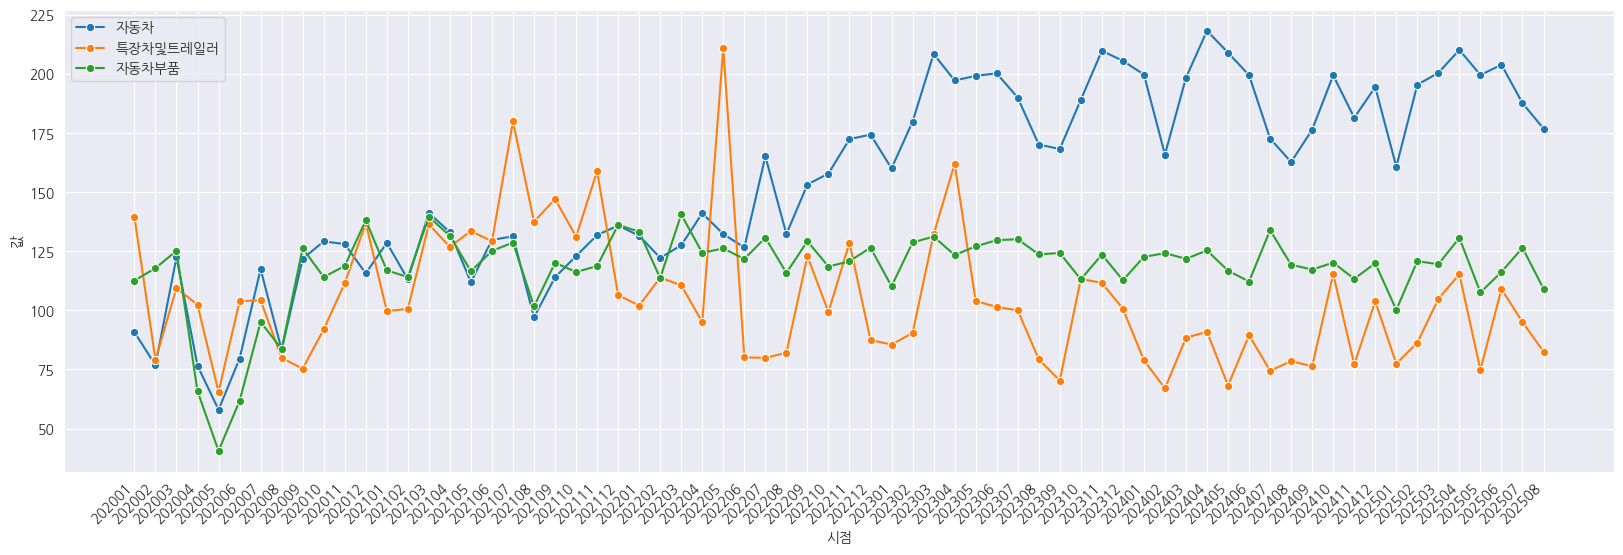

In [11]:
df_ex7 = df_ex[df_ex['통계항목코드1'].str.startswith('312') &  df_ex['통계항목코드1'].str.endswith('AA')  &  (df_ex['통계항목코드1_길이'] == 7) ]
pd.pivot(data=df_ex7, index='시점', columns='통계항목명1', values='값')
#df_ex7['값_ma'] = df_ex7['값'].rolling(window=3).mean()

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_ex7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 석탄및석유제품

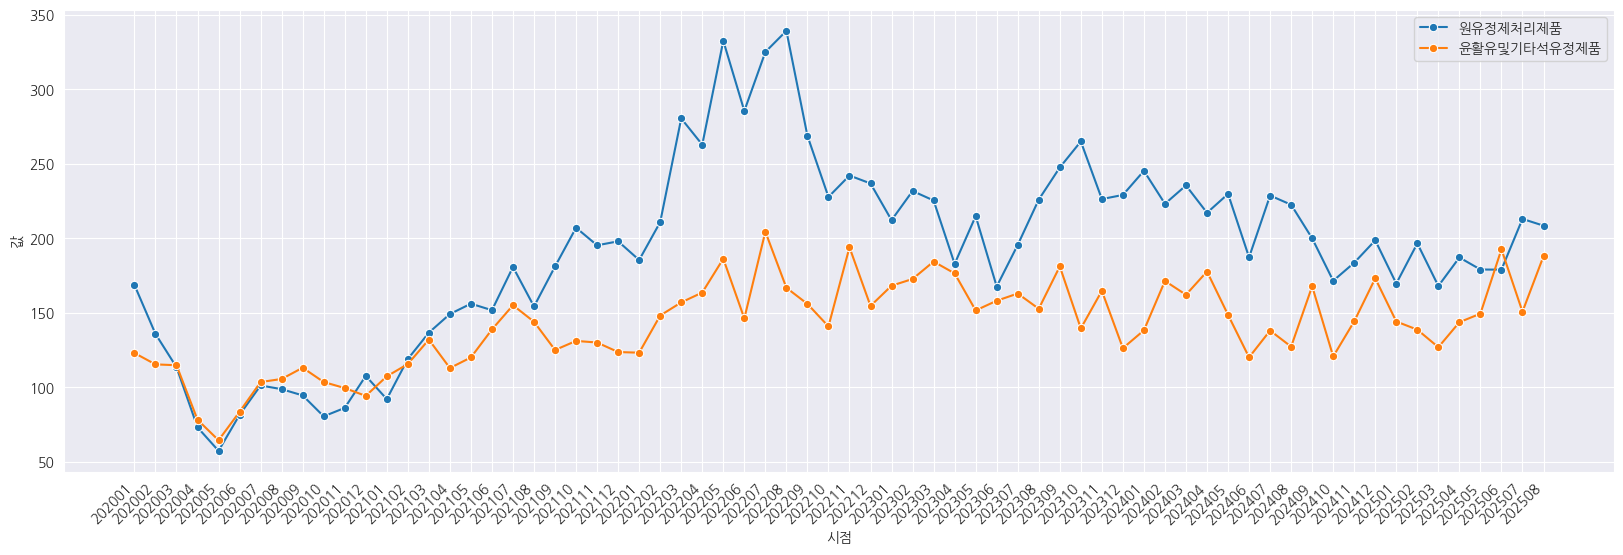

In [13]:
df_ex7 = df_ex[df_ex['통계항목코드1'].str.startswith('304') &  df_ex['통계항목코드1'].str.endswith('AA')  &  (df_ex['통계항목코드1_길이'] == 7) ]

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_ex7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 컴퓨터,전자및광학기기

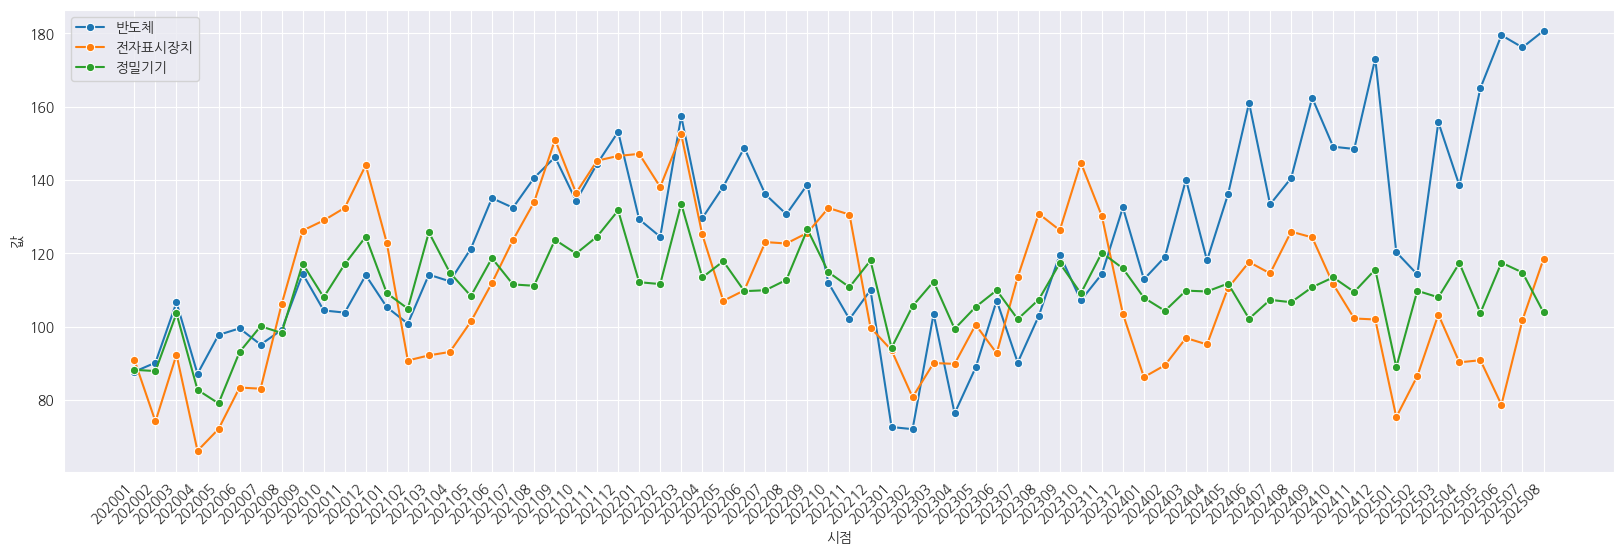

In [14]:
df_ex7 = df_ex[df_ex['통계항목코드1'].str.startswith('309') &  df_ex['통계항목코드1'].str.endswith('AA')  &  (df_ex['통계항목코드1_길이'] == 6) ]
df_ex7 = df_ex7[df_ex7['통계항목명1'].isin(['반도체', '정밀기기', '전자표시장치'])]
plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_ex7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 음식료품
    + 정제당 : 제과, 음료, 가공식품

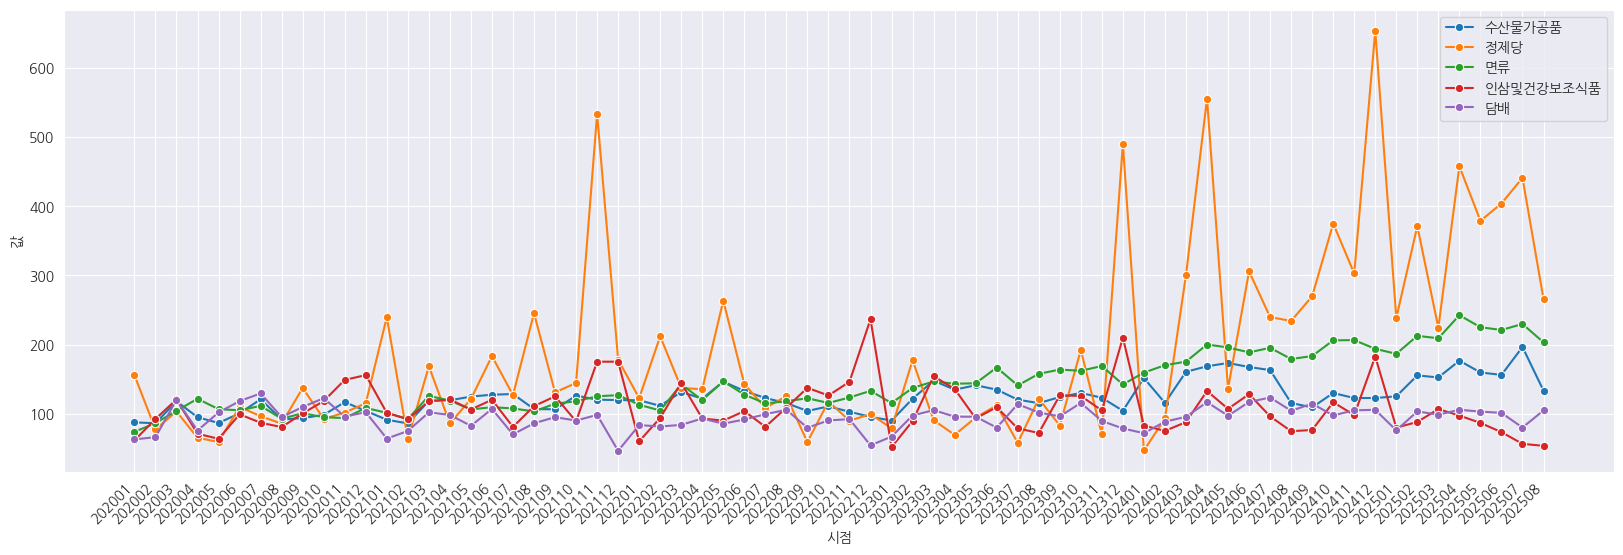

In [15]:
df_ex7 = df_ex[df_ex['통계항목코드1'].str.startswith('301') &  df_ex['통계항목코드1'].str.endswith('AA')  &  (df_ex['통계항목코드1_길이'] == 8) ]

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_ex7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 품화학제품
    + 기초무기화학물질 = 황산·가성소다·암모니아·산소·질소 같은 기본 무기화학 원재료. 2차 가공산업(플라스틱, 비료, 제약, 반도체, 철강 등)에 들어가는 기초 재료라고 보면 됩니다.
    + 기초유기화학물질 = 석유화학 기초 원료 (에틸렌·프로필렌·벤젠·톨루엔·자일렌·부타디엔 등) 👉 플라스틱, 합성섬유, 합성고무, 의약품 등 모든 유기화학 downstream 산업의 뿌리

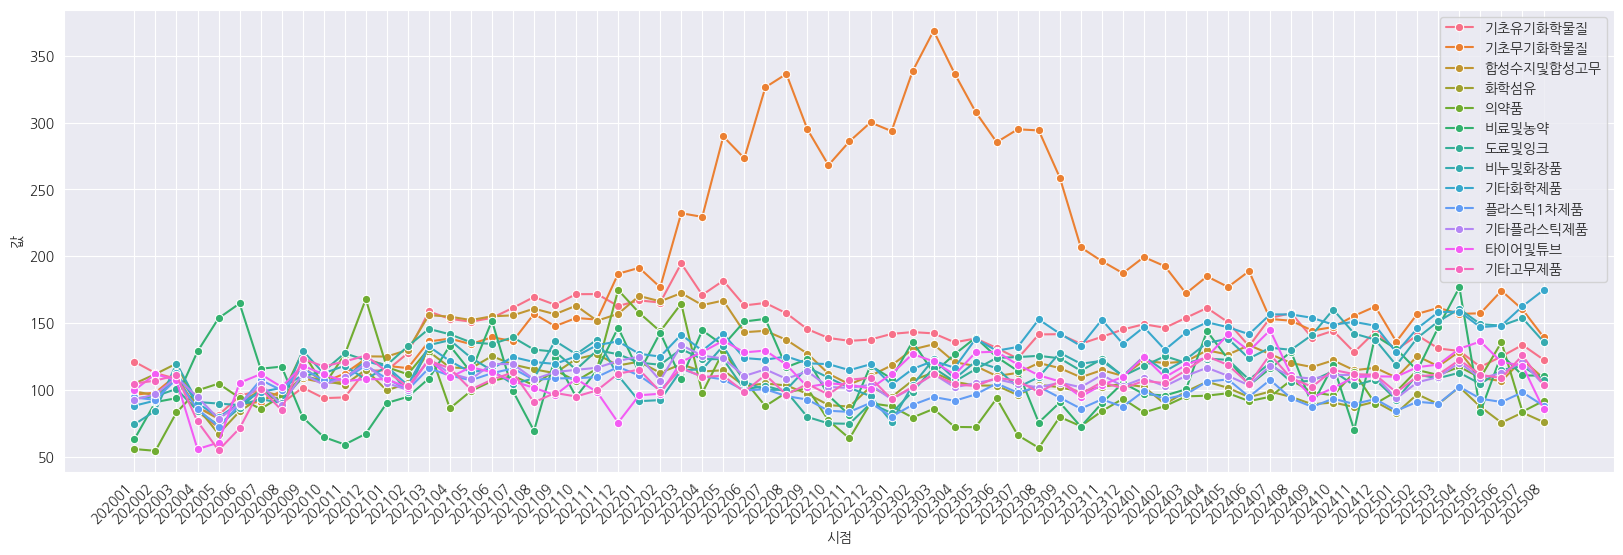

In [16]:
df_ex7 = df_ex[df_ex['통계항목코드1'].str.startswith('305') &  df_ex['통계항목코드1'].str.endswith('AA')  &  (df_ex['통계항목코드1_길이'] == 7) ]

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_ex7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 1차금속제품
    + 철강1차제품 : 철강 1차 제품: 전통적 기간산업, 경기 민감. 자동차·조선·건설 수요와 직결
    + 비철금속괴및1차제품 : 첨단산업, 특히 반도체/배터리/전기차와 직결 → 신산업 수요 반영

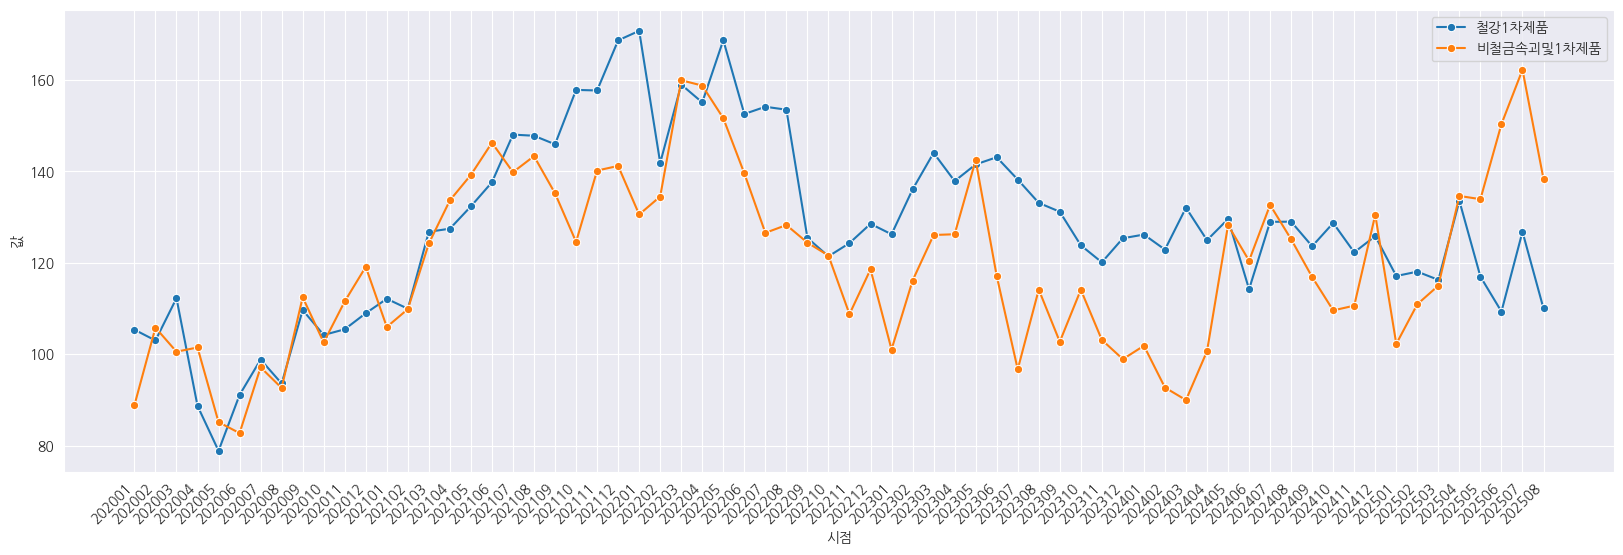

In [17]:
df_ex7 = df_ex[df_ex['통계항목코드1'].str.startswith('307') &  df_ex['통계항목코드1'].str.endswith('AA')  &  (df_ex['통계항목코드1_길이'] == 6) ]
# 이동평균 계산 (window=3개월)
#df_ex7['값_ma'] = df_ex7['값'].rolling(window=3).mean()

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_ex7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

---

### 품목입명 수입금액지수 (2020=100)

In [18]:
df_im = api.get_statistic_search(통계표코드="403Y003", 주기="M", 검색시작일자="202001", 검색종료일자="202510")
df_im['값'] = df_im['값'].astype(float)

df_im['통계항목코드1_길이'] = df_im['통계항목코드1'].apply(lambda x: len(x))
df_im3 = df_im[(df_im['통계항목코드1_길이'] == 3) & (df_im['통계항목명1'] != '총지수')]
pd.pivot(data=df_im3, index='시점', columns='통계항목명1', values='값').tail(12)

통계항목명1,공산품,광산품,농림수산품
시점,,,
202409,128.06,163.71,110.48
202410,132.54,171.93,132.75
202411,122.52,162.23,114.78
202412,133.94,163.24,110.02
202501,118.80,179.07,128.56
202502,118.36,144.23,128.11
202503,130.87,158.97,127.91
202504,130.63,159.61,136.95
202505,121.23,157.06,129.29


- 광산품

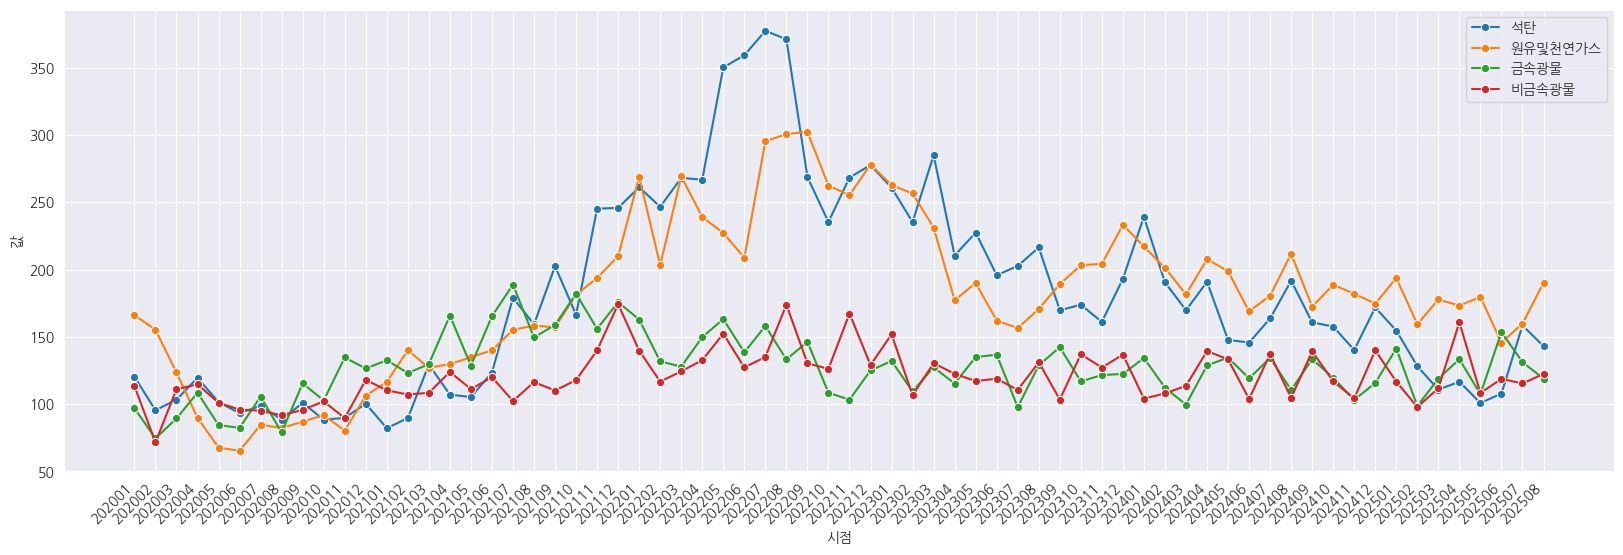

In [19]:
df_im7 = df_im[df_im['통계항목코드1'].str.startswith('201') &  df_im['통계항목코드1'].str.endswith('AA')  &  (df_im['통계항목코드1_길이'] == 7) ]
# 이동평균 계산 (window=3개월)
#df_ex7['값_ma'] = df_ex7['값'].rolling(window=3).mean()

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_im7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 공산품

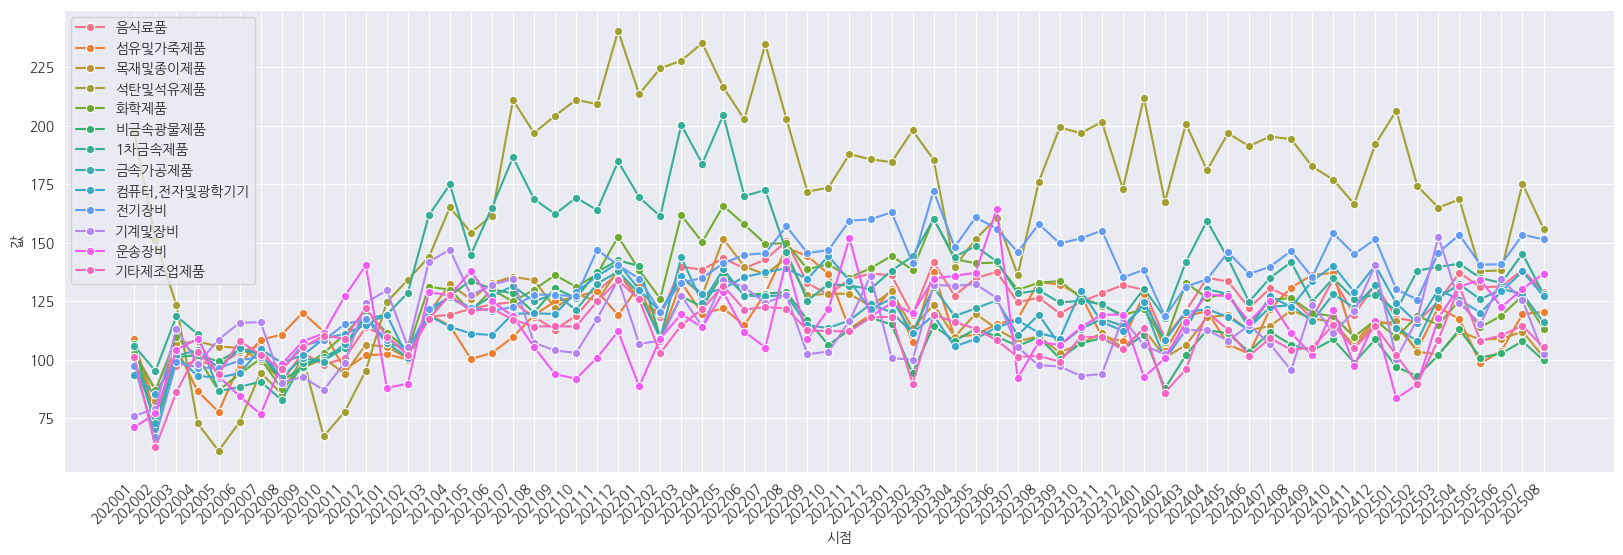

In [20]:
df_im7 = df_im[df_im['통계항목코드1'].str.startswith('3') &  df_im['통계항목코드1'].str.endswith('AA')  &  (df_im['통계항목코드1_길이'] == 5) ]
# 이동평균 계산 (window=3개월)
#df_ex7['값_ma'] = df_ex7['값'].rolling(window=3).mean()

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_im7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 농품림수산품

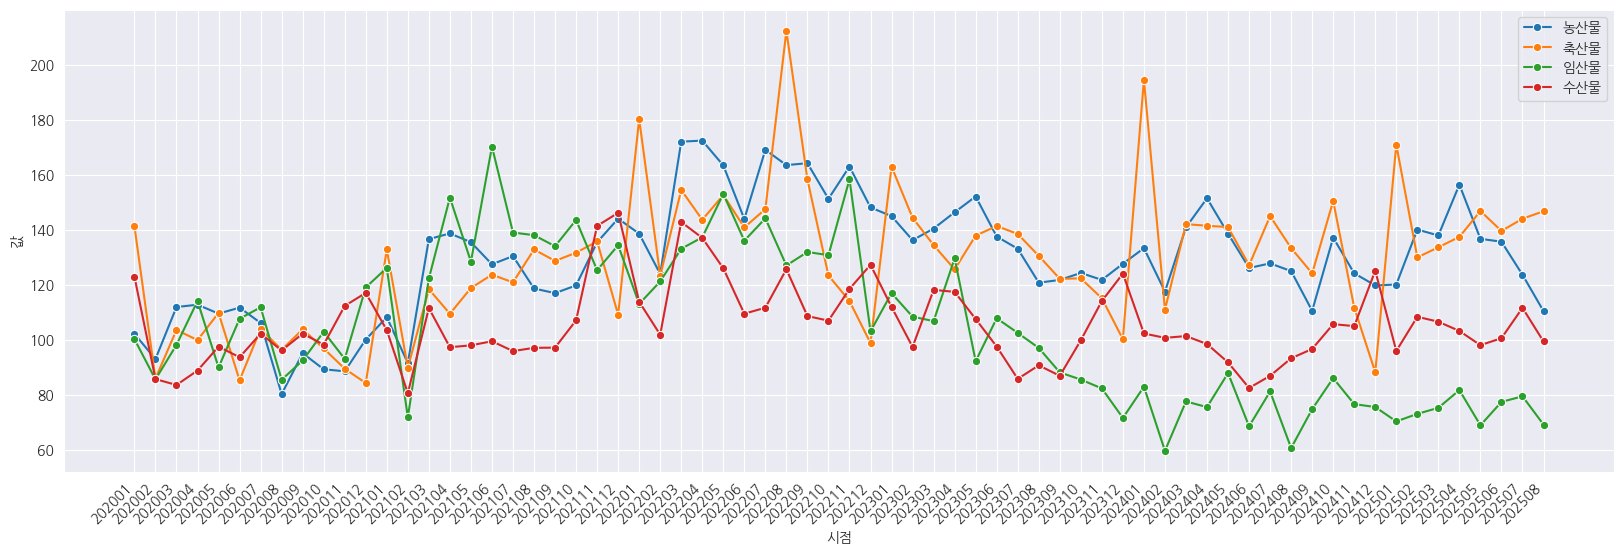

In [21]:
df_im7 = df_im[df_im['통계항목코드1'].str.startswith('101') &  df_im['통계항목코드1'].str.endswith('AA')  &  (df_im['통계항목코드1_길이'] == 6) ]
# 이동평균 계산 (window=3개월)
#df_ex7['값_ma'] = df_ex7['값'].rolling(window=3).mean()

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_im7, hue="통계항목명1", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()